In [2]:
# %load ../jupyter_imports.py
%load_ext autoreload
%autoreload 2

from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.io import loadmat, savemat
from math import floor, ceil
# Script to add the entire project directory structure to the python path
import sys, os

# Find the root directory of the nse project
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['analysis', 'nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
for d in ["linear", "prelim", "utils", "kerasmodels"]:
	if 'p\\%s' % d not in sys.path:
		sys.path.append('p\\%s' % d)

# Now import all the other stuff:
from utils import preprocess
from utils import process
from utils import misc 
from linear import linear_models

In [17]:
%load ../standard_prep.py
x = loadmat('%s/HighGammaAllChannels10sMovingZ.mat' % misc.get_data_path())
e105 = x['data'][:, 104]
stim = loadmat('%s/DynRip.cchspct.6oct.100hz' % misc.get_data_path())
stim, resp = preprocess.align(stim['spct'], e105)

In [40]:
r1, r2 = linear_models.search_ridge_params(stim, resp)

---39.792614698410034 seconds---
---40.87671613693237 seconds---
---40.08782458305359 seconds---
---40.284300804138184 seconds---
---41.38036894798279 seconds---
---40.02000641822815 seconds---


In [43]:
r

array([0.0002104])

In [30]:
# %load ../standard_prep.py
p = process.split_data(stim, resp, 2, train_split = 0.8)

In [33]:
h, r = linear_models.boosting(process.flatten_spct(p.train_stim), p.train_resp, process.flatten_spct(p.test_stim), p.test_resp, 50)

---437.7875723838806 seconds---
0.00279246546235371
---436.50201177597046 seconds---
0.00041374188337018816
---437.2460210323334 seconds---
0.0008368341066384787
---437.70878529548645 seconds---
0.00015780532579349435
---436.8216531276703 seconds---
0.00029472217229323846
---437.293541431427 seconds---
0.0005531175320595476
---437.5150170326233 seconds---
0.0007274627709572438
---435.4418466091156 seconds---
0.0010160212134531074
---435.91457891464233 seconds---
0.0011607659785886767
---435.3590657711029 seconds---
0.0014164279705648976
---435.4428427219391 seconds---
0.0015103951679331126
---435.2234275341034 seconds---
0.0013719968256410695
---435.88765358924866 seconds---
0.0014363640429519082
---435.17356181144714 seconds---
0.001289507307983489
---435.653279542923 seconds---
0.0014777497012391613
---435.2403829097748 seconds---
0.0014610846174184973
---435.9784104824066 seconds---
0.0015213836384020644
---437.08844208717346 seconds---
0.0013664395341619114
---435.5495572090149 sec

In [34]:
h.shape

(5000,)

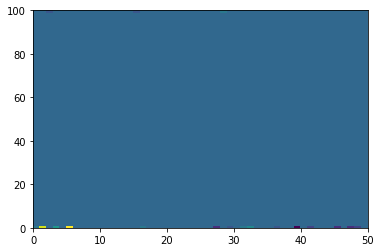

In [35]:
plt.pcolor(np.reshape(h, (100, 50)))

In [36]:
savemat('%s/boosting_h.mat' % misc.get_data_path(), dict([('h', h), ('rscore', r)]))

In [37]:
p.test_stim.shape

(8889, 100, 50)